In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1><center><font size="6">Provinsi Jawa Barat</font></center></h1>

<h2><center><font size="4">Dataset used: Jabar Digital Service</font></center></h2>

<br>
# <a id='0'>Content</a>

- <a href='#1'>Data</a>  
- <a href='#2'>Peta Wilayah</a>  
- <a href='#3'>Overview Stunting di Jawa Barat Secara Umum</a> 
- <a href='#4'>Overview Stunting di Jawa Barat Antar Tahun</a> 
- <a href='#5'>Overview Stunting di Jawa Barat Antar Kota</a> 
- <a href='#6'>Overview Stunting di Jawa Barat Antar Kabupaten</a> 


# <a id='1'>Data</a> 

In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.plotly as py
import plotly.offline as py
import squarify
import seaborn as sns
import geojson
import IPython.display
import geopandas as gpd
import folium 

import matplotlib.pyplot as plt

from descartes import PolygonPatch
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

py.init_notebook_mode(connected=True)

In [2]:
soal = pd.read_csv('../input/Soal-01.csv')

with open("../input/kota_kabupaten.geojson") as json_file:
    json_data = geojson.load(json_file)
    
fname = "../input/kota_kabupaten.geojson"
df = gpd.read_file(fname)

soal['kode_kota_kabupaten'] = soal['kode_kota_kabupaten'].astype('object')

soal.columns = ['provinsi', 'bps_kode', 'nama_kota_kabupaten', 'tahun',
       'prevalensi_stunting']

soal['nama_kota_kabupaten'] = soal['nama_kota_kabupaten'].apply(lambda x :'Kabupaten Bekasi' if x == 'Kabupatenbekasi' else x)

In [3]:
soal.head()

,provinsi,bps_kode,nama_kota_kabupaten,tahun,prevalensi_stunting
0,JAWA BARAT,3201,Kabupaten Bogor,2015,26.223776
1,JAWA BARAT,3201,Kabupaten Bogor,2016,28.750000
2,JAWA BARAT,3201,Kabupaten Bogor,2017,28.440340
3,JAWA BARAT,3202,Kabupaten Sukabumi,2015,28.301887
4,JAWA BARAT,3202,Kabupaten Sukabumi,2016,25.242718


Dari data diatas (Soal-01.csv), kita dapat melihat bahwa data pertama ialah data daerah-daerah di Jawa Barat beserta prevalensi_stunting mulai tahun 2015 sampai 2017. Ada 27 nama daerah yang berbeda baik kota maupun kabupaten di Jawa Barat.

In [4]:
area = (pd.concat([df['kemendagri_nama'], df['geometry'].area], axis=1)).sort_values(0, ascending=False)

#Area_km
df_3857 = df.to_crs(epsg = 3857)
area_km = df_3857.geometry.area / 10**6 

# new_df
new_df = pd.concat([df['bps_kode'], df['geometry'], df['geometry'].centroid , df['geometry'].centroid.y, df['geometry'].centroid.x, df['geometry'].area, pd.DataFrame(area_km)], axis=1)
new_df.columns = ['bps_kode', 'geometry', 'center' ,'lat', 'lng', 'area', 'area_km']

new_df['nama_daerah'] = df['kemendagri_nama']

In [5]:
# Table For Tabaleau
geometry = []
center = []
lat = []
lng = []
area_ = []
area_km = []
bps_nama = []


for x, y in enumerate(soal['bps_kode']):
    for n, m in enumerate(new_df['bps_kode']):
        if str(y) == str(m):
            geometry.append(new_df.iloc[n,1])
            center.append(new_df.iloc[n,2])
            lat.append(new_df.iloc[n,3])
            lng.append(new_df.iloc[n,4])
            area_.append(new_df.iloc[n,5])
            area_km.append(new_df.iloc[n,6])
            
soal['geometry'] = geometry
soal['center'] = center
soal['lat'] = lat
soal['lng'] = lng
soal['area'] = area_
soal['area_km'] = area_km

for x, y in enumerate(soal['bps_kode']):
    for n, m in enumerate(df['bps_kode']):
        if str(y) == str(m):
            bps_nama.append(df.iloc[n,5])
            
soal['bps_nama'] = bps_nama

# <a id='2'>Peta Wilayah</a> 

In [6]:
df.head()

,id,id_provinsi,kemendagri_kode,kemendagri_nama,bps_kode,bps_nama,geometry
0,177,13,32.02,KAB. SUKABUMI,3202,SUKABUMI,"(POLYGON ((106.741523942441 -6.71556328298331,..."
1,185,13,32.03,KAB. CIANJUR,3203,CIANJUR,"(POLYGON ((107.230209481309 -6.60494007985326,..."
2,179,13,32.05,KAB. GARUT,3205,GARUT,"(POLYGON ((107.918159571828 -6.94759587691624,..."
3,173,13,32.06,KAB. TASIKMALAYA,3206,TASIKMALAYA,"(POLYGON ((108.354894556061 -7.35285623216097,..."
4,176,13,32.08,KAB. KUNINGAN,3208,KUNINGAN,"(POLYGON ((108.421057608645 -6.78413229067036,..."


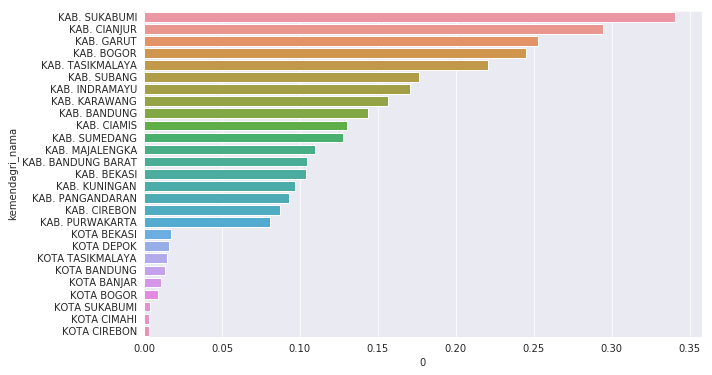

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(y="kemendagri_nama", x=0, data=area)

In [8]:
map_ = folium.Map(location = [-6.920386775511731, 107.60327763626293], zoom_start=8)
#folium.GeoJson(jabar['geometry'][0]).add_to(map_)

for row in new_df.iterrows():
    row_values = row[1]
    location = [row_values['lat'], row_values['lng']] 
    popup = popup = '<strong>' + row_values['nama_daerah'] + '</strong>'
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(map_)

display(map_)

Berdasarkan data geojson, kita dapat melihat bahwa Jawa Barat memiliki 27 daerah dengan 8 daerah merupakan Kota dan 19 daerah merupakan Kabupaten. Dari grafik pertama tersebut, dapat diketahui bahwa Kabupaten Sukabumi memiliki area terluas di Jawa Barat dan Kota Cirebon memiliki area terkecil.

Bila dibandingkan antara Kabupaten dan Kota, maka Kabupaten terluas adalah Kabupaten Sukabumi dan Kabupaten terkecil ialah Kabupaten Purwakarta. Sedangkan Kota terluas ialah Kota Bekasi dan Kota terkecil ialah Kota Cirebon.

In [9]:
soal_2015 = soal[soal['tahun']==2015]
soal_2016 = soal[soal['tahun']==2016]
soal_2017 = soal[soal['tahun']==2017]

soal_all = soal['prevalensi_stunting'].describe().reset_index()
soal_2015 = soal_2015['prevalensi_stunting'].describe().reset_index()
soal_2016 = soal_2016['prevalensi_stunting'].describe().reset_index()
soal_2017 = soal_2017['prevalensi_stunting'].describe().reset_index()

soal_all['2015'] = soal_2015['prevalensi_stunting']
soal_all['2016'] = soal_2016['prevalensi_stunting']
soal_all['2017'] = soal_2017['prevalensi_stunting']

soal_all.columns =['sum_statistic_stunting', 'all_year', '2015', '2016', '2017']

# <a id='3'>Overview Stunting di Jawa Barat Secara Umum</a>

In [2]:
%%HTML 
<div class='tableauPlaceholder' id='viz1558016101817' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;43&#47;43HJ7TX9W&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;43HJ7TX9W' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;43&#47;43HJ7TX9W&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1558016101817');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Website untuk tableau:
https://public.tableau.com/shared/43HJ7TX9W?:display_count=yes&:origin=viz_share_link

Dari dashboard teresebut, kita dapat melihat 3 jenis visualisasi. Pertama, ialah visualisai yang berisi peta provinsi Jawa Barat dengan 27 daerah yang berbeda baik kota dan kabupaten. Kedua, merupakan visualisai prevalansi stunting berdasarkan tahun dan bps_nama cummulative dari tahun 2015 sampai 2017. Ketiga, merupakan visualisai prevalansi stunting berdasarkan tahun dan bps_nama beserta rata-rata prevalansi stunting se Jawa Barat. 

Di sebelah pojok kiri bawah, anda bisa memilih nama daerah yang hanya ingin anda lihat dan juga dapat memilih berdasarkan tahun. Selain memilih, anda juga dapat mengeclick secara langsung baik individual atau kelompok pada nama daerah di masing-masing table tersebut.

Sekilas, CIANJUR memiliki nilai stunting cummulative tertinggi dan Kota Depok memiliki nilai stunting cummulative tererndah. Setiap tahunnya, dari tahun 2015 sampai tahun 2017 daerah-daerah yang ada di Jawa Barat mengalami penurunan dan juga kenaikan. Dapat terlihat pada dashboard diatas, bahwa pada tahun 2017 GARUT memiliki nilai stunting yang tertinggi yang mencolok serta kebanyakan nilai stunting setiap daerah pada tiap tahunnya diatas rata-rata nilai stunting Provinsi Jawa Barat (diatas garis average). 

## Histogram Pravelensi Stunting Jawa Barat

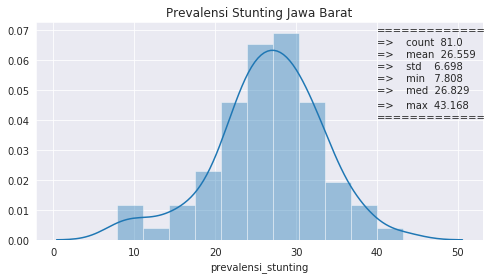

In [11]:
soal = soal[['bps_nama', 'tahun', 'prevalensi_stunting']]

plt.figure(figsize=(8,4))
plt.title('Prevalensi Stunting Jawa Barat')
ax = sns.distplot(soal['prevalensi_stunting'])
sum_all = soal['prevalensi_stunting'].describe().reset_index().iloc[[0,1,2,3,5,7] ,:]
sum_all.iloc[4, 0] = 'med'
y = 0.065
for a, b in zip(sum_all['index'], sum_all['prevalensi_stunting']):
    if a == 'count':
        ax.text(40, y, '=============\n' + '=>    ' + str(a) + '  ' + "{:,}".format(round(b, 2)))
    elif a == 'max':
        y -= 0.005
        ax.text(40, y, '=>    ' + str(a) + '  ' + "{:,}".format(round(b, 3)) + '\n=============')
    elif a == 'std':
        ax.text(40, y, '=>    ' + str(a) + '    ' + "{:,}".format(round(b, 3)))
    elif a == 'min':
        ax.text(40, y, '=>    ' + str(a) + '   ' + "{:,}".format(round(b, 3)))
    else:   
        ax.text(40, y, '=>    ' + str(a) + '  ' + "{:,}".format(round(b, 3)))
    y -= 0.004

Dari grafik tersebut, terlihat bentuk histogram hampir seperti bentuk bel/normal distribusi yang artinya mean, median dan mode memiliki nilai yang hampir sama yaitu sekitar angka 26. Sehingga expektasi stunting di Jawa Barat adalah 26. Bila daerah yang ada di Jawa Barat memiliki angka di bawah 26 maka dapat dikatakan bahwa daerah tersebut berada di bawah rata-rata nilai stunting Jawa Barat. Sehingga dapat menjadi bahan evaluasi karena kinerja stunting daerah tersebut yang baik. Begitu juga dengan sebaliknya, jika angka stunting suatu daerah diatas 26 maka daerah tersebut perlu mendapatkan perhatian khusus karena melebihi angka rata-rata stunting di Jawa Barat.

Kita dapat mengetahui bahwa data prevalensi stunting terdiri dari 81 angka yang berbeda dari setiap tahun 2015, 2016, 2017 dan dari setiap deerah-dearah yang berbeda yang ada di Jawa Barat. Rata-rata expektasi stunting yang terjadi di Jawa Barat adalah 26.55, dapat dikatakan bahwa daerah dibawah angka rata-rata tersebut baik dan buruk jika diatas angka 26.55.

Standard deviasi Jawa Barat ialah 6.69 yang berarti bahwa (normal distribusi): 
1. Kebanyakan anak-anak (sekitar 68%) berada di range nilai stunting (19.86 - 33.24) atau memiliki nilai stunting 6.69 lebih tinggi sampai nilai stunting 6.69 lebih rendah dari rata-rata stunting di Jawa Barat  - satu standard deviasi. 
2. Kebanyakan anak-anak (sekitar 95%) berada di range nilai stunting (13.17 - 39.93) atau memiliki nilai stunting 13.38 lebih tinggi sampai nilai stunting 13.38 lebih rendah dari rata-rata stunting di Jawa Barat - dua standard deviasi. 
3. Kebanyakan anak-anak (sekitar 99.7%) berada di range nilai stunting (6.48 - 46.62) atau memiliki nilai stunting 20.07 lebih tinggi sampai nilai stunting 20.07 lebih rendah dari rata-rata stunting di Jawa Barat - tiga standard deviasi. 

Selama tahun 2015 sampai 2017, nilai terendah stanting ialah 7.8 yang terjadi pada tahun 2015 di Kota Depok. Sedangkan nilai tertinggi adalah 43.16 yang terjadi pada tahun 2017 di Kabupaten Garut.

# <a id='4'>Overview Stunting di Jawa Barat Antar Tahun</a>

In [12]:
def selisih_kenaikan(soal):
    nama = []
    tahun_2015_2016 = []
    tahun_2016_2017 = []
    tahun_2015_2017 = []
    pct_tahun_2015_2016 = []
    pct_tahun_2016_2017 = []
    pct_tahun_2015_2017 = []
    baru = pd.DataFrame()
    
    for x, y in enumerate(list(soal['bps_nama'].unique())):
        pertama = ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[1]) - ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[0])
        kedua = ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[2]) - ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[1])
        ketiga = ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[2]) - ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[0])
        pct_pertama = (pertama / ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[0])) * 100
        pct_kedua = (kedua / ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[1])) * 100
        pct_ketiga = (ketiga / ((soal['prevalensi_stunting'][soal['bps_nama']==y]).iloc[0])) * 100
        tahun_2015_2016.append(pertama)
        tahun_2016_2017.append(kedua)
        tahun_2015_2017.append(ketiga)
        pct_tahun_2015_2016.append(pct_pertama)
        pct_tahun_2016_2017.append(pct_kedua)
        pct_tahun_2015_2017.append(pct_ketiga)
        nama.append(y)

    baru['bps_nama'] = nama
    baru['Stunting_2015_2016'] = tahun_2015_2016
    baru['Stunting_2016_2017'] = tahun_2016_2017
    baru['Stunting_2015_2017'] = tahun_2015_2017
    baru['%Stunting_2015_2016'] = pct_tahun_2015_2016
    baru['%Stunting_2016_2017'] = pct_tahun_2016_2017
    baru['%Stunting_2015_2017'] = pct_tahun_2015_2017
    
    return baru

baru = selisih_kenaikan(soal)
baru = baru[['bps_nama','%Stunting_2015_2016', '%Stunting_2016_2017',
       '%Stunting_2015_2017']]

In [3]:
%%HTML 
<div class='tableauPlaceholder' id='viz1558071577707' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fi&#47;fix_jbr&#47;sum_stat&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='fix_jbr&#47;sum_stat' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fi&#47;fix_jbr&#47;sum_stat&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1558071577707');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='983px';vizElement.style.height='663px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Website untuk tableau:
https://public.tableau.com/views/fix_jbr/summary_statistic?:embed=y&:display_count=yes&:origin=viz_share_link

Secara umum setiap daerah di Jawa Barat mengalami perbedaan setiap tahunnya. Ada yang mengalami kenaikan stunting dan ada yang mengalami penurunan stunting. (visualisasi Selisih Stunting % per tahun (Jawa Barat)).

### Urutan nilai terbaik daerah pada Tahun 2015 - 2016
Urutan dari penurunan stunting terbaik ialah Tasikmalaya, Pangandaran, Garut, Majalengka, Ciamis, Cirebon, Kota Sukabumi, Sukabumi, Bekasi, Cianjur, Subang, Kota Cimahi, Indramayu, Kota Tasikmalaya, Bandung, Karawang, Bogor, Bandung Barat, Purwakarta, Sumedang, Kota Depok, Kota Bandung, Kota Banjar, Kota Cirebon, Kota Bekasi, dan Kota Bogor. 

### Urutan nilai terbaik daerah pada Tahun 2016 - 2017
Urutan dari penurunan stunting terbaik ialah Kota Sukabumi, Kuningan, Cirebon, Majalengka, Cianjur, Tasikmalaya, Kota Bandung, Sumedang, Bekasi, Kota Cimahi, Ciamis, Bogor, Pangandaran, Purwakarta, Subang, Bandung Barat, Bandung, Kota Tasikmalaya, Kuningan, Kota Banjar, Indramayu, Kota Bekasi, Garut, Sukabumi, Kota Cirebon, Kota Depok, Kota Bogor.

### Urutan nilai terbaik daerah pada Tahun 2015 - 2017
Urutan dari penurunan stunting terbaik ialah Kota Sukabumi, Karawang, Kota Bandung, Sumedang, Kota Bekasi, Bogor, Purwakarta, Kota Banjar, Bandung Barat, Cianjur, Kota Cirebon, Cirebon, Kota Cimahi, Bekasi, Bandung, Kota Tasikmalaya, Majalengka, Subang, Indramayu, Kota Bogor, Ciamis, Tasikmalaya, Sukabumi, Pangandaran, Kota Depok, Garut.

### Jawa Barat pada 2015 - 2016 Jawa Barat (1 Tahun)
Pada visualisasi (Stunting mean) Jawa Barat mengalami selisih peningkatan rata-rata prosentasi stunting antar tahun yang relatif kecil yaitu 1.98% bila dibangkan dengan selisih tahun 2016-2017 atau 2015-2017. Standard deviasi Jawa Barat adalah 24.561 dari prosentasi rata-rata, yang berarti bahwa kenaikan-kenaikan prosentasi stunting di wilayah Jawa Barat berada di range -22.581 sampai 26.541 untuk satu standard deviasi. Range tersebut menunjukan bahwa beberapa daerah mengalami penurunan stunting dan beberapa daerah mengalami kenaikan stunting. Sehingga karena adanya daerah-daerah yang mengalami penurunan tersebut, membuat rata-rata prosentasi selisih peningkatan antar tahun menjadi kecil. 

### Jawa Barat pada 2016 - 2017 Jawa Barat (1 Tahun)
Sedangkan dari tahun 2016 ke tahun 2017, kita dapat melihat bahwa peningkatan prosentasi yang terjadi pada tahun 2017 begitu tinggi yaitu 18.4% (naik 9.3 kali dari sebelumnya). Padahal pada tahun sebelumnya Provinsi Jawa Barat dapat menjaga kenaikan prosentase stunting di angka 1.98%. Standard deviasi pada waktu ini ialah 25.297 dari prosentase selisih rata-rata antar tahun (18.4%). Range untuk satu standard deviasi adalah -6.897 sampai 43.697. Dari range tersebut kita dapat mengetahui bahwa penurunan stunting di tahun ini begitu kecil yaitu -6.897 berbeda dari kurun waktu sebelumnya yaitu -22.581 pada range yang sama yaitu satu standard deviasi.

### Jawa Barat pada 2015 - 2017 Jawa Barat (2 Tahun)

Dari tahun 2015 sampai tahun 2017, Jawa Barat mengalami selisih prosentase peningkatan stunting di angka 18.61%. Kinerja pada tahun pertama amatlah bagus tetapi tidak dengan kinerja pada tahun kedua sehingga rata-rata selama 2 tahun menjadi tinggi. Dengan standard deviasi yang ada yaitu 32.756 kita dapat mengetahui bahwa selama 2 tahun peningkatan selisih nilai stunting untuk setiap daerah di Jawa Barat terjadi pada range -14.146 sampai 51.366 untuk satu standard deviasi. 

### Kesimpulan
Pada tahun 2015 - 2016, Jawa Barat menurunkan nilai stunting yang ada di daerahnya akan tetapi pada tahun 2016 - 2017, Jawa Barat mengalami kenaikan nilai stunting sehingga mengalami penurunan kinerja.

# <a id='5'>Overview Stunting di Jawa Barat Antar Kota</a>

Untuk mempermudah dalam mengevaluasi, maka mari kita coba membagi wilayah Jawa Barat berdasarkan kota dan kabupaten. Hal tersebut perlu dilakukan karena kota dan kabupaten memiliki karakteristik yang berbeda.

In [14]:
list_kota = ['KOTA BOGOR',
 'KOTA SUKABUMI',
 'KOTA BANDUNG',
 'KOTA CIREBON',
 'KOTA BEKASI',
 'KOTA DEPOK',
 'KOTA CIMAHI',
 'KOTA TASIKMALAYA',
 'KOTA BANJAR']

kota = soal[soal['bps_nama'].apply(lambda x: True if x in list_kota else False)]
kabupaten = soal[soal['bps_nama'].apply(lambda x: True if x not in list_kota else False)]

In [4]:
%%HTML 
<div class='tableauPlaceholder' id='viz1558016206345' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WM&#47;WM75HM4ZT&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;WM75HM4ZT' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;WM&#47;WM75HM4ZT&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1558016206345');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Website untuk tableau:
https://public.tableau.com/shared/WM75HM4ZT?:display_count=yes&:origin=viz_share_link

#### Kota Sukabumi Kota terbaik tahun 2015 - 2017
Rata-rata stunting untuk setiap kota di Jawa Barat adalah 22.74. Kota yang memiliki nilai stunting yang lebih tinggi dari rata-rata kota ialah Kota Tasikmalaya, Kota Sukabumi, Kota Bandung, Kota Banjar, Kota Cirebon, dan Kota Cimahi. Sedangkan Kota yang berada di bawah rata-rata ialah Kota Bekasi, Kota Bogor, dan Kota Depok. Meskipun demikian, untuk mengevaluasi kinerja Kota digunakan selisih prosentase nilai stunting dalam kurun waktu tahun 2015 - 2017. Sehingga didapatkan inforamsi bahwa Kota Sukabumi yang memiliki rata-rata nilai stunting peringkat 2 tertinggi selama 3 tahun memiliki kinerja yang baik dalam tiga tahun ini yakni dengan mengalami penurunan nilai stunting secara berturut-turut dan hanya Kota Sukabumi yang bisa melakukannya baik antar kota dan kabupaten.

#### Kota Bogor Kota terburuk tahun 2015 - 2017
Kota Bogor memiliki nilai cummulative stunting terendah ketiga. Akan tetapi kinerja Kota Bogor selama tahun 2015 - 2017 tidaklah sebaik dengan kota-kota yang lainnya karena dari tahun 2015 sampai 2017 Kota Bogor menjadi Kota tertinggi yang dapat meningaktkan nilai stuntingnya. Selisih nilai prosentase dari tahun 2015 ke 2017 Kota Bogor ialah 140%.

# <a id='6'>Overview Stunting di Jawa Barat Antar Kabupaten</a>

In [5]:
%%HTML
<div class='tableauPlaceholder' id='viz1558018106891' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;CG&#47;CGR8S6HGY&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;CGR8S6HGY' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;CG&#47;CGR8S6HGY&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1558018106891');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Website untuk tableau:
https://public.tableau.com/shared/CGR8S6HGY?:display_count=yes&:origin=viz_share_link

#### Karawang Kabupaten terbaik tahun 2015 - 2017
Rata-rata stunting untuk setiap kabupaten di Jawa Barat adalah 28.47. Kota yang memiliki nilai stunting dari yang tertinggi ialah Cianjur, Bandung, Garut, Bandung Barat, Sukabumi, Tasikmalaya, Purwakarta, Majalengka, Sumedang, Karawang, Kuningan, Bogor, cirebon, ciamis, Indramayu, Pangandaran, Subang, Bekasi. Karawang menampati posisi kesepuluh nilai rata-rata stunting tertinggi. Tetapi dari tahun 2015 ke 2017 Karawang berhasil menjadi yang terbaik dalam mengurangi nilai stunting yaitu menurunkan sebesar 11.3%. Meskipun pada tahun 2015 - 2016 mengalami kenaikan nilai stunting sebesar 2.6%.

#### Sukabumi Kabupaten terburuk tahun 2015 - 2017
Sukabumi memiliki nilai cummulative stunting tertinggi kelima. Kinerja Sukabumi selama tahun 2015 - 2017 tidaklah sebaik dengan kota-kota yang lainnya karena dari tahun 2015 sampai 2017 Sukabumi menjadi kabupaten tertinggi yang mengalami peningkatan stunting. Selisih nilai prosentase dari tahun 2015 ke 2017 Sukabumi ialah 32.9%.